# Exercises 3

## Part 1

- Import Numpy, matplotlib.pyplot and skimage.data
- From the data module import the moon picture
- Plot that image
- Check the image dimensions
- Calculate the image mean, max and min
- Create a mask of pixels with values above half of the max
- Create a cropped version of the image containing the crater on the top left
- Crop the mask as well
- Plot the cropped mask on top of the cropped image using transparency and the colormaps you want.
- Create a list of the pixels and count them

## Part 2

- Find how to generate normally distributed numbers (within numpy.random module)
- Create a matrix of the same size as the cropped images with normally distributed values
- Plot it
- Add the random matrix to the cropped image, and plot it.
- Adjust the noise level by multiplying the random matrix with different factors (1, 10, 100). Plot the result
- From skimage.data load the rocket image
- Check its size
- Crop the rocket image to the same size as the moon image
- Replace the first channel of the cropped rocket image, with the image of the cropped moon
- Plot the result

# Solutions 3

## Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.data

In [2]:
#load moon image
image = skimage.data.moon()

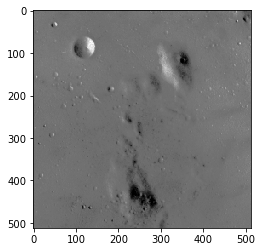

In [3]:
plt.imshow(image, cmap = 'gray')
plt.show()

In [4]:
#get shape of image
image.shape

(512, 512)

In [5]:
#get infos about image values

In [6]:
np.mean(image)

112.16957092285156

In [7]:
image.mean()

112.16957092285156

In [8]:
image.max()

255

In [9]:
image.min()

0

In [10]:
maxval = image.max()

In [11]:
#create a mask of pixels higher than 0.5*(max value)
mask = image>0.5*maxval

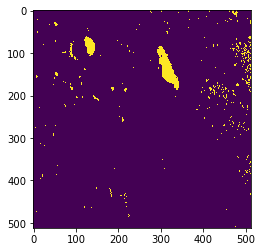

In [12]:
plt.imshow(mask)
plt.show()

In [13]:
#crop an image region
image_crop = image[50:150,50:150]
mask_crop = mask[50:150,50:150]

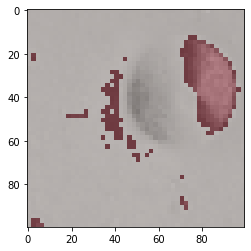

In [14]:
#superpose image and mask
plt.imshow(image_crop,cmap = 'gray')
plt.imshow(mask_crop,cmap = 'Reds', alpha = 0.5)
plt.show()

In [15]:
#get only positive mask pixels
pixels = image_crop[mask_crop]

In [16]:
len(pixels)

1072

## Part 2

In [23]:
#find the function to generate normally distributed samples (Google is your best friend)
np.random.standard_normal?

Docstring:
standard_normal(size=None)

Draw samples from a standard Normal distribution (mean=0, stdev=1).

Parameters
----------
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.

Returns
-------
out : float or ndarray
    A floating-point array of shape ``size`` of drawn samples, or a
    single sample if ``size`` was not specified.

Notes
-----
For random samples from :math:`N(\mu, \sigma^2)`, use one of::

    mu + sigma * np.random.standard_normal(size=...)
    np.random.normal(mu, sigma, size=...)

See Also
--------
normal :
    Equivalent function with additional ``loc`` and ``scale`` arguments
    for setting the mean and standard deviation.

Examples
--------
>>> np.random.standard_normal()
2.1923875335537315 #random

>>> s = np.random.standard_normal(8000)
>>> s
array([ 0.6888893 ,  0.78096262, -0.89086505, ...,  0.498763

In [24]:
image_crop.shape[1]

100

In [26]:
#generate a matrix of the right size
normal_matrix = np.random.standard_normal((image_crop.shape[0], image_crop.shape[1]))

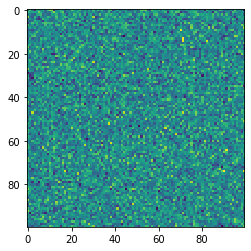

In [27]:
plt.imshow(normal_matrix)
plt.show()

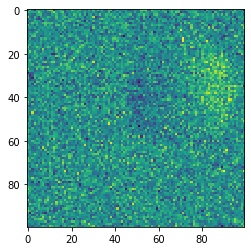

In [28]:
im1 = image_crop +100* normal_matrix

plt.imshow(im1)
plt.show()

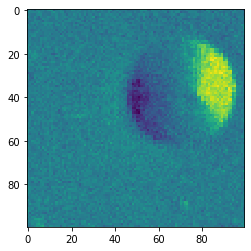

In [29]:
im1 = image_crop + 10*normal_matrix

plt.imshow(im1)
plt.show()

In [30]:
rocket = skimage.data.rocket()

In [31]:
rocket.shape

(427, 640, 3)

In [32]:
rocket_cropped = rocket[50:150,50:150,:]

In [33]:
rocket_cropped.shape

(100, 100, 3)

In [34]:
rocket_cropped[:,:,0] = image_crop

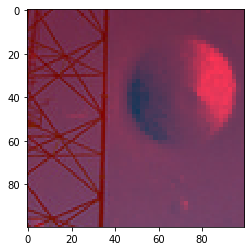

In [35]:
plt.imshow(rocket_cropped)
plt.show()